
### SPARKS FOUNDATION INTERN

## Arzoo Sah 

**Computer Vision And IoT**

## TASK 2 : Color Identification in Images

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

In [4]:
def get_image(image_path):         #to read all images 
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [5]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [6]:
COLORS = {
    'RED' : [128,0,0],
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
}

img_dir = '/content/drive/MyDrive/images'
images = []

for file in os.listdir(img_dir):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(img_dir, file)))

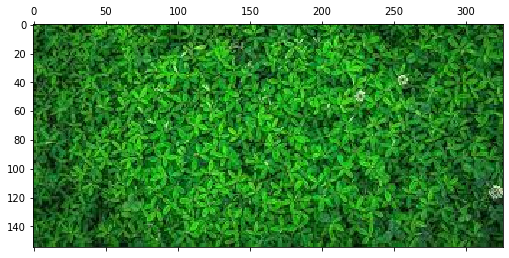

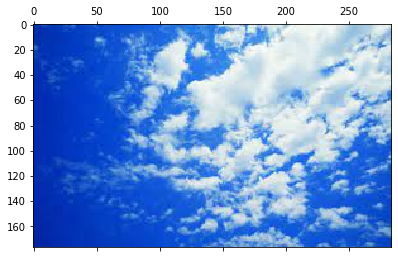

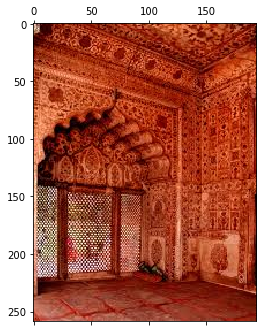

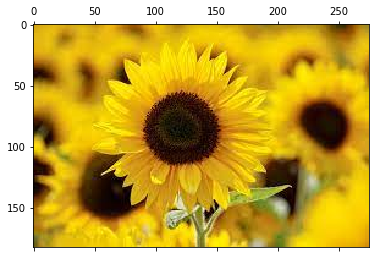

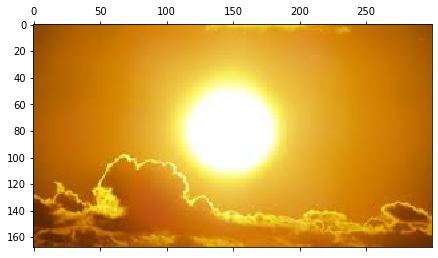

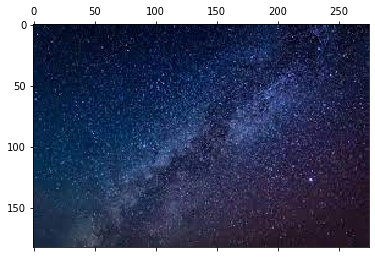

In [7]:
for i in images:      #show all the images in folder
  plt.matshow(i)

In [8]:
def get_colors(image,num_of_colors,chart):
    
    new_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    new_image = new_image.reshape(new_image.shape[0]*new_image.shape[1], 3)

    clf = KMeans(n_clusters = num_of_colors)
    labels = clf.fit_predict(new_image)

    counts = Counter(labels)

    center_colors = clf.cluster_centers_
    
    # We get ordered colors by iterating through the keys
    
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

    return rgb_colors

In [9]:
def match_image_by_color(image, color, threshold = 60, num_of_colors = 10): 
    
    image_colors = get_colors(image, num_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(num_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [10]:
def show_selected_images(images, color, threshold, colors_to_match):
    
    index = 1 
    
    for i in range(len(images)):
      selected = match_image_by_color(images[i],color,threshold,colors_to_match)
      if (selected):
        plt.subplot(1, 5, index)
        plt.imshow(images[i])
        index += 1

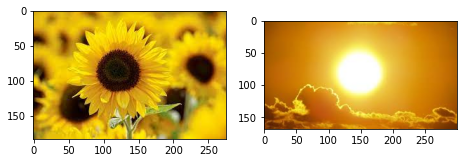

In [11]:
plt.figure(figsize = (20, 10))     #to view images of color YELLOW 
show_selected_images(images,COLORS['YELLOW'], 60, 5)
plt.show()

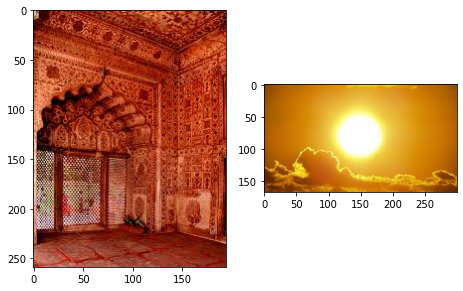

In [12]:
plt.figure(figsize = (20, 10))  #to view images of color RED
show_selected_images(images,COLORS['RED'],40, 5)
plt.show()

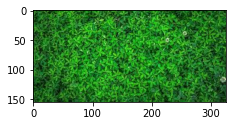

In [13]:
plt.figure(figsize = (20, 10))     #to view images of GREEN color
show_selected_images(images,COLORS['GREEN'],50, 5)
plt.show()

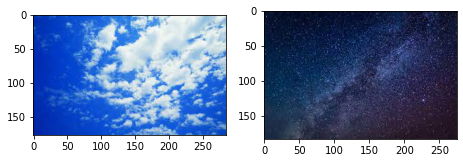

In [14]:
plt.figure(figsize = (20, 10))  #to view images of BLUE color
show_selected_images(images,COLORS['BLUE'], 60, 5)
plt.show()

**Thank you**